# Manual least squares

April 18, 2021

## Least squares

b1 = slope equation:

<img src = 'lsm.jpg' width = 400>

In [2]:
import numpy as np
import pandas as pd 

In [3]:
arr = np.load('../data/basic_arr.npy')

df = pd.DataFrame(arr)
df.head(3)

,0,1
0,34,5
1,108,17
2,64,11


In [5]:
df = df.rename(columns = {0:'bill', 1:'tip'})
df.head()

,bill,tip
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14


In [6]:
bill = 'bill'
tip = 'tip'

#### X: bill
    - Independent
#### Y: tip 
    - Dependent on bill

## 1. Centroid

#### x mean

In [7]:
df.bill.mean()

74.0

#### y mean

In [8]:
df.tip.mean()

10.0

## 2. Deviations

In [9]:
df['x deviation'] = df.bill - df.bill.mean()
df.head(3)

,bill,tip,x deviation
0,34,5,-40.0
1,108,17,34.0
2,64,11,-10.0


In [10]:
df['y deviation'] = df.tip - df.tip.mean()
df.head()

,bill,tip,x deviation,y deviation
0,34,5,-40.0,-5.0
1,108,17,34.0,7.0
2,64,11,-10.0,1.0
3,88,8,14.0,-2.0
4,99,14,25.0,4.0


### 3. Deviation products

In [11]:
df['deviation products'] = df['x deviation'] * df['y deviation']
df.head(3)

,bill,tip,x deviation,y deviation,deviation products
0,34,5,-40.0,-5.0,200.0
1,108,17,34.0,7.0,238.0
2,64,11,-10.0,1.0,-10.0


## 4. Bill deviations squared

In [13]:
df['bill deviations squared'] = (df.bill - df.bill.mean())**2
df.head(3)

,bill,tip,x deviation,y deviation,deviation products,bill deviations squared
0,34,5,-40.0,-5.0,200.0,1600.0
1,108,17,34.0,7.0,238.0,1156.0
2,64,11,-10.0,1.0,-10.0,100.0


<img src = 'lsm.jpg' width = 400>

## 5. Get quotient

In [14]:
numerator = df['deviation products'].sum()
denominator = df['bill deviations squared'].sum()

In [15]:
numerator, denominator

(615.0, 4206.0)

In [16]:
b1 = numerator / denominator
b1

0.14621968616262482

## Sum so far

- The slope (b1) of our regression line = 0.1462

#### y = b0 + b1*x 

***

## 6. Find y intercept = b0

- y = b0 + b1*x
- b0 = y - b1*x

#### We know for sure the centroid is on the regression line

In [20]:
y = df.tip.mean()
x = df.bill.mean()

In [21]:
b0 = y - b1*x

b0

-0.8202567760342365

## 7. Our regression line
y = b0 + b1x

#### y = -0.8202 + 0.1462x
or<br>
y = 0.1462x - 0.8202

## 8. Plot this line 

In [23]:
import matplotlib.pyplot as plt

### 8.1 plt scatterplot

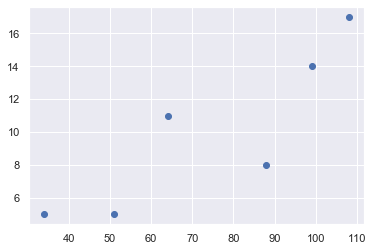

In [24]:
x = df.bill
y = df.tip

plt.scatter(x, y)

### 8.2 Get two points on the line

I have the centroid -- but to show the line all the way through the scatterplot, I should pick a low and high x

In [32]:
x = [30, 100]

In [40]:
b0, b1

(-0.8202567760342365, 0.14621968616262482)

#### Another couple of points

In [41]:
def get_y(x):
    sol = []
    for i in x:
        sol.append(b0 + b1*i)
        
    return sol

In [42]:
y = get_y(x)
y

[3.566333808844508, 13.801711840228245]

### 8.3 Plot the line

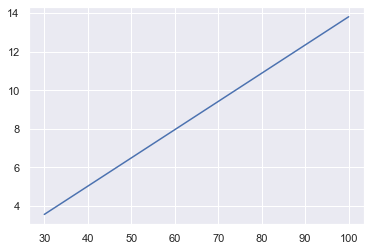

In [43]:
plt.plot(x, y)

### 8.4 Combine scatterplot with the regression line

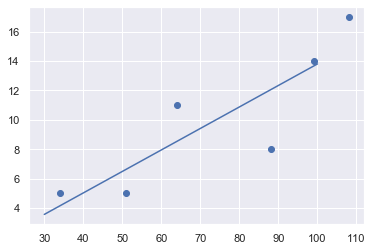

In [46]:
plt.scatter(df.bill, df.tip)
plt.plot(x, y)

## Cool!!!!